In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('citibike.csv')

/var/folders/m_/swwg3ntd0f77llsbm3pv8_r00000gn/T/ipykernel_50364/2647145425.py:1: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('citibike.csv')


In [3]:
len(data)

30487735

In [4]:
data.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0,FA2F660C8D433037,electric_bike,2022-03-04 18:58:36,2022-03-04 19:13:51,Washington St & Barrow St,5847.08,University Pl & E 14 St,5905.14,40.731911,-74.008769,40.734814,-73.992085,member
1,1,03B6FE6FAEE61465,classic_bike,2022-03-06 20:37:09,2022-03-06 20:45:28,Washington St & Barrow St,5847.08,W 11 St & 6 Ave,5914.03,40.731911,-74.008769,40.735324,-73.998004,member
2,2,6E6995761B4A5760,classic_bike,2022-03-01 15:13:49,2022-03-01 15:19:53,1 Ave & E 110 St,7522.02,E 110 St & Madison Ave,7587.14,40.792327,-73.938300,40.796154,-73.947821,member
3,3,AA51CCF6CEDD6033,classic_bike,2022-03-11 13:59:03,2022-03-11 14:06:43,Crescent St & Broadway,6827.11,31 Rd & 21 St,6929.02,40.763359,-73.928647,40.766824,-73.930486,member
4,4,72AA3A7D430D8EF8,classic_bike,2022-03-08 14:59:16,2022-03-08 15:05:04,Crescent St & Broadway,6827.11,31 Rd & 21 St,6929.02,40.763359,-73.928647,40.766824,-73.930486,member


In [5]:
data = data.drop(columns = ['Unnamed: 0'])

In [6]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,FA2F660C8D433037,electric_bike,2022-03-04 18:58:36,2022-03-04 19:13:51,Washington St & Barrow St,5847.08,University Pl & E 14 St,5905.14,40.731911,-74.008769,40.734814,-73.992085,member
1,03B6FE6FAEE61465,classic_bike,2022-03-06 20:37:09,2022-03-06 20:45:28,Washington St & Barrow St,5847.08,W 11 St & 6 Ave,5914.03,40.731911,-74.008769,40.735324,-73.998004,member
2,6E6995761B4A5760,classic_bike,2022-03-01 15:13:49,2022-03-01 15:19:53,1 Ave & E 110 St,7522.02,E 110 St & Madison Ave,7587.14,40.792327,-73.938300,40.796154,-73.947821,member
3,AA51CCF6CEDD6033,classic_bike,2022-03-11 13:59:03,2022-03-11 14:06:43,Crescent St & Broadway,6827.11,31 Rd & 21 St,6929.02,40.763359,-73.928647,40.766824,-73.930486,member
4,72AA3A7D430D8EF8,classic_bike,2022-03-08 14:59:16,2022-03-08 15:05:04,Crescent St & Broadway,6827.11,31 Rd & 21 St,6929.02,40.763359,-73.928647,40.766824,-73.930486,member


In [7]:
len(data)

30487735

First, filter out the data that start station or end station is out of NYC

NYC Latitude and Longtitude

West -74.257159 East -73.699215

North 40.915568 South 40.495992

In [8]:
out = data.loc[(data['start_lat']>40.915568)|
                      (data['end_lat']>40.915568)|
                      (data['start_lat']<40.495992)|
                      (data['end_lat']<40.495992)|
                      (data['start_lng']>-73.699215)|
                     (data['end_lng']>-73.699215)|
                     (data['start_lng']<-74.257159)|
                     (data['end_lng']<-74.257159)]
len(out)

13

In [9]:
data = data.loc[~data.index.isin(out.index)]
len(data)

30487722

In [10]:
data.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [11]:
selectcol = ['ride_id','started_at', 'ended_at','start_lat', 'start_lng', 'end_lat', 'end_lng']
data1 = data[selectcol]
data1.head()

,ride_id,started_at,ended_at,start_lat,start_lng,end_lat,end_lng
0,FA2F660C8D433037,2022-03-04 18:58:36,2022-03-04 19:13:51,40.731911,-74.008769,40.734814,-73.992085
1,03B6FE6FAEE61465,2022-03-06 20:37:09,2022-03-06 20:45:28,40.731911,-74.008769,40.735324,-73.998004
2,6E6995761B4A5760,2022-03-01 15:13:49,2022-03-01 15:19:53,40.792327,-73.938300,40.796154,-73.947821
3,AA51CCF6CEDD6033,2022-03-11 13:59:03,2022-03-11 14:06:43,40.763359,-73.928647,40.766824,-73.930486
4,72AA3A7D430D8EF8,2022-03-08 14:59:16,2022-03-08 15:05:04,40.763359,-73.928647,40.766824,-73.930486


In [12]:
data1['started_at'] = pd.to_datetime(data1['started_at'], errors='coerce')

/var/folders/m_/swwg3ntd0f77llsbm3pv8_r00000gn/T/ipykernel_50364/2871730465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['started_at'] = pd.to_datetime(data1['started_at'], errors='coerce')


In [13]:
data1['ended_at'] = pd.to_datetime(data1['ended_at'], errors='coerce')

/var/folders/m_/swwg3ntd0f77llsbm3pv8_r00000gn/T/ipykernel_50364/2948922445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['ended_at'] = pd.to_datetime(data1['ended_at'], errors='coerce')


In [14]:
len(data1)

30487722

In [15]:
import numpy as np
from datetime import datetime

In [16]:
data1['Date'] = data1['started_at'].dt.date
data1.head()

/var/folders/m_/swwg3ntd0f77llsbm3pv8_r00000gn/T/ipykernel_50364/2868481403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Date'] = data1['started_at'].dt.date


,ride_id,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,Date
0,FA2F660C8D433037,2022-03-04 18:58:36,2022-03-04 19:13:51,40.731911,-74.008769,40.734814,-73.992085,2022-03-04
1,03B6FE6FAEE61465,2022-03-06 20:37:09,2022-03-06 20:45:28,40.731911,-74.008769,40.735324,-73.998004,2022-03-06
2,6E6995761B4A5760,2022-03-01 15:13:49,2022-03-01 15:19:53,40.792327,-73.938300,40.796154,-73.947821,2022-03-01
3,AA51CCF6CEDD6033,2022-03-11 13:59:03,2022-03-11 14:06:43,40.763359,-73.928647,40.766824,-73.930486,2022-03-11
4,72AA3A7D430D8EF8,2022-03-08 14:59:16,2022-03-08 15:05:04,40.763359,-73.928647,40.766824,-73.930486,2022-03-08


In [17]:
data1['Duration'] = (data1['ended_at']-data1['started_at'])
data1['Duration'] = data1['Duration'].dt.total_seconds()/60
data1.head()

/var/folders/m_/swwg3ntd0f77llsbm3pv8_r00000gn/T/ipykernel_50364/1465179486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Duration'] = (data1['ended_at']-data1['started_at'])
/var/folders/m_/swwg3ntd0f77llsbm3pv8_r00000gn/T/ipykernel_50364/1465179486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Duration'] = data1['Duration'].dt.total_seconds()/60


,ride_id,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,Date,Duration
0,FA2F660C8D433037,2022-03-04 18:58:36,2022-03-04 19:13:51,40.731911,-74.008769,40.734814,-73.992085,2022-03-04,15.250000
1,03B6FE6FAEE61465,2022-03-06 20:37:09,2022-03-06 20:45:28,40.731911,-74.008769,40.735324,-73.998004,2022-03-06,8.316667
2,6E6995761B4A5760,2022-03-01 15:13:49,2022-03-01 15:19:53,40.792327,-73.938300,40.796154,-73.947821,2022-03-01,6.066667
3,AA51CCF6CEDD6033,2022-03-11 13:59:03,2022-03-11 14:06:43,40.763359,-73.928647,40.766824,-73.930486,2022-03-11,7.666667
4,72AA3A7D430D8EF8,2022-03-08 14:59:16,2022-03-08 15:05:04,40.763359,-73.928647,40.766824,-73.930486,2022-03-08,5.800000


In [18]:
(data1['Date'].min(),data1['Date'].max())

(datetime.date(2021, 11, 1), datetime.date(2022, 10, 31))

In [19]:
import matplotlib.pyplot as plt

In [20]:
data1['Duration'].describe()

count    3.048772e+07
mean     1.763134e+01
std      1.171751e+02
min     -1.130117e+03
25%      5.583333e+00
50%      1.001667e+01
75%      1.786667e+01
max      1.589380e+05
Name: Duration, dtype: float64

In [21]:
(data1['Duration'].min(),data1['Duration'].max())

(-1130.1166666666666, 158938.05)

(array([3.0414881e+07, 7.1504000e+04, 4.2100000e+02, 2.4100000e+02,
        1.4100000e+02, 1.0400000e+02, 8.0000000e+01, 6.7000000e+01,
        7.7000000e+01, 4.0000000e+01, 3.6000000e+01, 2.2000000e+01,
        2.0000000e+01, 1.3000000e+01, 8.0000000e+00, 8.0000000e+00,
        6.0000000e+00, 1.0000000e+00, 1.0000000e+00, 6.0000000e+00,
        7.0000000e+00, 1.0000000e+00, 1.0000000e+00, 3.0000000e+00,
        3.0000000e+00, 0.0000000e+00, 3.0000000e+00, 4.0000000e+00,
        2.0000000e+00, 1.0000000e+00, 2.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 2.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e

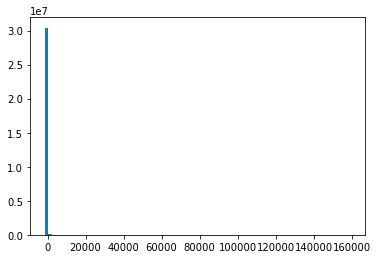

In [22]:
plt.hist(data1['Duration'], bins=100)

(array([1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

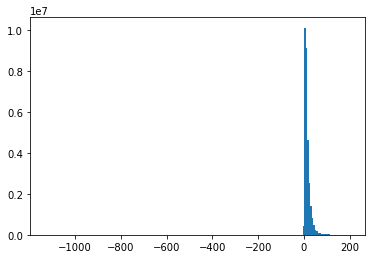

In [23]:
plt.hist(data1['Duration'].loc[data1['Duration']<200], bins=200)

In [24]:
cleaned_data = data1.loc[(data1['Duration']>0)&(data1['Duration']<200)]
len(cleaned_data)

30372211

In [25]:
cleaned_data.head()

,ride_id,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,Date,Duration
0,FA2F660C8D433037,2022-03-04 18:58:36,2022-03-04 19:13:51,40.731911,-74.008769,40.734814,-73.992085,2022-03-04,15.250000
1,03B6FE6FAEE61465,2022-03-06 20:37:09,2022-03-06 20:45:28,40.731911,-74.008769,40.735324,-73.998004,2022-03-06,8.316667
2,6E6995761B4A5760,2022-03-01 15:13:49,2022-03-01 15:19:53,40.792327,-73.938300,40.796154,-73.947821,2022-03-01,6.066667
3,AA51CCF6CEDD6033,2022-03-11 13:59:03,2022-03-11 14:06:43,40.763359,-73.928647,40.766824,-73.930486,2022-03-11,7.666667
4,72AA3A7D430D8EF8,2022-03-08 14:59:16,2022-03-08 15:05:04,40.763359,-73.928647,40.766824,-73.930486,2022-03-08,5.800000


In [28]:
ridedata = cleaned_data.groupby('Date').agg({'ride_id':'count'}).rename(columns={'ride_id':'ridership'}).reset_index()
ridedata

,Date,ridership
0,2021-11-01,89393
1,2021-11-02,82517
2,2021-11-03,86957
3,2021-11-04,85541
4,2021-11-05,85993
...,...,...
360,2022-10-27,118803
361,2022-10-28,109263
362,2022-10-29,107748
363,2022-10-30,98068


In [31]:
daily = ridedata

In [32]:
daily.to_csv('CitiDaily.csv')